In [1]:
import numpy as np
from ipywidgets import interact
from invariant import invariant_ellipse, transfer_matrix

In [2]:
from elegantIO import elegantLatticeFile
from elegantIO import elegant_findtwiss

import matplotlib.pyplot as plt

In [3]:
fodo_lattice=elegantLatticeFile()
fodo_lattice.addElement('qfh', 'kquad', l=0.8, k1=1.6)
fodo_lattice.addElement('qdh', 'kquad', l=0.8, k1=-1.6)
fodo_lattice.addElement('df', 'edrift', l=0.25)

fodo_lattice.appendToBeamline('half', 'df', 'qfh', 'df', 'df', 'qdh', 'df')
long_fodo = ['half']*10
fodo_lattice.appendToBeamline('fodo', *long_fodo)
fodo_lattice.setUseLine()
fodo_lattice.useline

'FODO'

# Matched Beam

In [4]:
twiss_list, twiss_parameter=elegant_findtwiss(fodo_lattice,matched=1)

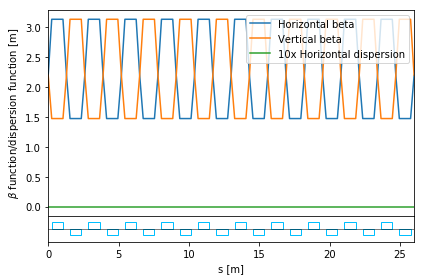

In [5]:
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
fodo_lattice.plotBeamline(ax2)

ax1.plot(twiss_list[0], twiss_list[1], label='Horizontal beta')
ax1.plot(twiss_list[0], twiss_list[6], label='Vertical beta')
ax1.plot(twiss_list[0], twiss_list[4]*10, label='10x Horizontal dispersion')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function/dispersion function [m]')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)

fodo_matrix_x = transfer_matrix(twiss_list)

In [6]:
def f(x):
    example = invariant_ellipse(fodo_matrix_x)
    while x > 0:
        example.propagate()
        x -= 1
    example.plot_test_particle()

print("propagate by x cells")
interact(f, x=(0,20,1));

propagate by x cells


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xMCwgZGVzY3JpcHRpb249dSd4JywgbWF4PTIwKSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2V0LWludGVyYWPigKY=


In [7]:
def f(x):
    example = invariant_ellipse(fodo_matrix_x)
    while x > 0:
        example.propagate()
        x -= 1
    example.plot_test_and_normal()

print("propagate by x cells")
interact(f, x=(0,20,1));

propagate by x cells


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xMCwgZGVzY3JpcHRpb249dSd4JywgbWF4PTIwKSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2V0LWludGVyYWPigKY=


In [8]:
np.zeros((4,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

# Mismatched Beam

In [9]:
twiss_list_mis, twiss_parameter_mis = elegant_findtwiss(fodo_lattice, matched=0, 
                                                        initial_optics=[twiss_list[1][-1], -twiss_list[2][-1], 0, 0, 1, 0, 0, 0])

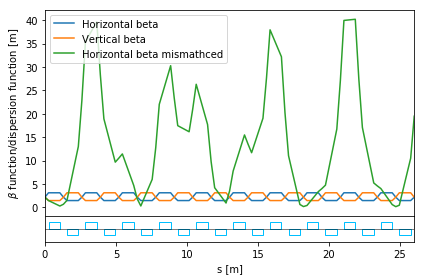

In [10]:
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
fodo_lattice.plotBeamline(ax2)

ax1.plot(twiss_list[0], twiss_list[1], label='Horizontal beta')
ax1.plot(twiss_list[0], twiss_list[6], label='Vertical beta')
ax1.plot(twiss_list_mis[0], twiss_list_mis[1], label='Horizontal beta mismathced')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function/dispersion function [m]')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)

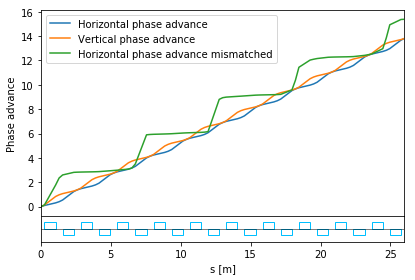

In [11]:
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
fodo_lattice.plotBeamline(ax2)

ax1.plot(twiss_list[0], twiss_list[3], label='Horizontal phase advance')
ax1.plot(twiss_list[0], twiss_list[8], label='Vertical phase advance')
ax1.plot(twiss_list_mis[0], twiss_list_mis[3], label='Horizontal phase advance mismatched')

ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'Phase advance')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)

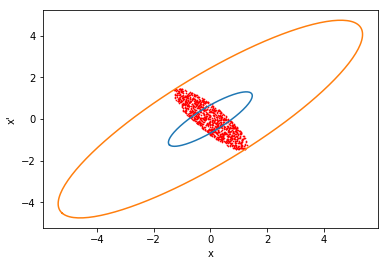

In [12]:
example = invariant_ellipse(fodo_matrix_x)
example.plot_mismatched()

In [13]:
def f(x):
    example = invariant_ellipse(fodo_matrix_x)
    while x > 0:
        example.propagate()
        x -= 1
    example.plot_both()

print("propagate by x cells")
interact(f, x=(0,20,1));

propagate by x cells


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xMCwgZGVzY3JpcHRpb249dSd4JywgbWF4PTIwKSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2V0LWludGVyYWPigKY=
